# **Prediksi Kerawanan Banjir di Kabupaten Bandung, Jawa Barat**

## Load data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df= pd.read_excel("/content/drive/MyDrive/MSIB/BISA AI/PROJECT CAPTONE_KEL 6/Dataset_Banjir.xlsx")
df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lokasi            681 non-null    object 
 1   latitude          681 non-null    object 
 2   longitude         681 non-null    object 
 3   curah_hujan       681 non-null    float64
 4   penggunaan lahan  681 non-null    int64  
 5   jenis tanah       681 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 32.0+ KB


#Preprocessing Data


* Pembersihan Kolom Lokasi: Mengubah lokasi sesuai format yang diinginkan.
* Penanganan Nilai Kosong: Mengisi atau menghapus nilai yang hilang.
* Encoding Data Kategorikal: Mengubah data kategori menjadi numerik jika diperlukan.
* Normalisasi/Penskalaan Data: Menyesuaikan skala data numerik.
* Menghapus Duplikasi: Memastikan tidak ada duplikasi data dalam dataset.

## Mengubah Nominal to Kategorik

In [4]:
tanah_mapping = {
    1: 'Regosol',
    2: 'Litosol',
    3: 'Andosol',
    4: 'Grumusol',
    5: 'Latosol',
    6: 'Aluvial',
    7: 'Podsolik',
    8: 'Clay'
}

# Menggunakan map untuk transformasi kolom
df['Jenis Tanah'] = df['jenis tanah'].map(tanah_mapping)

In [5]:
lahan_mapping = {
    1: 'Badan Air',
    2: 'Gedung/Bangunan',
    3: 'Hutan',
    4: 'Pekebunan/Kebun',
    5: 'Permukiman',
    6: 'Sawah',
    7: 'Sawah Tadah Hujan',
    8: 'Semak Belukar',
    9: 'Tegalan/Ladang'
}

# Menggunakan map untuk transformasi kolom
df['Penggunaan Lahan'] = df['penggunaan lahan'].map(lahan_mapping)

## Labelling Kerawanan Banjir
menngunakan pembobotan skor dengan teknik overlapping berdasarkan beberapa referensi jurnal

In [6]:
def skor_curah_hujan(curah_hujan):
  if curah_hujan <= 2500:
    return 1
  elif 2500 < curah_hujan <= 3000:
    return 2
  elif 3000 < curah_hujan <= 3500:
    return 3
  elif curah_hujan > 3500:
    return 4
df['Skor Curah Hujan'] = df['curah_hujan'].apply(skor_curah_hujan)

def skor_penggunaan_lahan(peng_lahan):
  if peng_lahan=='Hutan' or peng_lahan=='Badan Air':
    return 1
  elif peng_lahan=='Semak Belukar':
    return 2
  elif peng_lahan=='Tegalan/Ladang' or peng_lahan=='Pekebunan/Kebun':
    return 3
  elif peng_lahan=='Sawah' or peng_lahan=='Sawah Tadah Hujan':
    return 4
  elif peng_lahan=='Permukiman' or peng_lahan=='Gedung/Bangunan':
    return 5

df['Skor Peng. Lahan'] = df['Penggunaan Lahan'].apply(skor_penggunaan_lahan)

def skor_jenis_tanah(jenis_tanah):
  if jenis_tanah=='Aluvial' or jenis_tanah=='Clay':
    return 5
  elif jenis_tanah=='Latosol':
    return 4
  elif jenis_tanah=='Andosol' or jenis_tanah=='Grumusol' or jenis_tanah=='Podsolik' :
    return 2
  elif jenis_tanah=='Regosol' or jenis_tanah=='Litosol':
    return 1
df['Skor Jenis Tanah'] = df['Jenis Tanah'].apply(skor_jenis_tanah)

In [7]:
df['Kerawanan']=0.30*df['Skor Curah Hujan']+0.50*df['Skor Peng. Lahan']+0.20*df['Skor Jenis Tanah']

In [8]:
minimum = min(df['Kerawanan'])
maksimum = max(df['Kerawanan'])
selisih=(maksimum-minimum)/3

# Menentukan batas interval
batas1 = minimum + selisih
batas2 = minimum + 2 * selisih
batas3 = maksimum

# Membuat kolom baru untuk kategori interval
def kategori_kerawanan(kerawanan):
    if kerawanan <= batas1:
        return 'Rendah'
    elif batas1 < kerawanan <= batas2:
        return 'Sedang'
    elif batas2 < kerawanan <= batas3:
        return 'Tinggi'
    return 'Tidak Terdefinisi'  # Jika ada nilai yang tidak sesuai

# Menambahkan kolom kategori ke DataFrame
df['Kategori Kerawanan'] = df['Kerawanan'].apply(kategori_kerawanan)

# Tampilkan DataFrame dengan kategori baru
print(df[['Kerawanan', 'Kategori Kerawanan']])

     Kerawanan Kategori Kerawanan
0          1.6             Rendah
1          3.6             Tinggi
2          3.6             Tinggi
3          2.7             Sedang
4          3.2             Tinggi
..         ...                ...
676        3.1             Tinggi
677        3.6             Tinggi
678        2.6             Sedang
679        3.3             Tinggi
680        3.3             Tinggi

[681 rows x 2 columns]


In [9]:
df.head()

,lokasi,latitude,longitude,curah_hujan,penggunaan lahan,jenis tanah,Jenis Tanah,Penggunaan Lahan,Skor Curah Hujan,Skor Peng. Lahan,Skor Jenis Tanah,Kerawanan,Kategori Kerawanan
0,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, PANYIR...",-7.049.881,107.521.854,2272.94,1,5,Latosol,Badan Air,1,1,4,1.6,Rendah
1,"JAWA BARAT, KABUPATEN BANDUNG, SOREANG, SUKANA...",-7.065.081,107.518.936,2267.37,5,5,Latosol,Permukiman,1,5,4,3.6,Tinggi
2,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CUK...",-7.079.423,107.499.905,2269.68,5,5,Latosol,Permukiman,1,5,4,3.6,Tinggi
3,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, CIS...",-7.127.131,107.488.809,2216.54,7,3,Andosol,Sawah Tadah Hujan,1,4,2,2.7,Sedang
4,"JAWA BARAT, KABUPATEN BANDUNG, PASIRJAMBU, MAR...",-7.130.081,107.459.001,2383.19,5,3,Andosol,Permukiman,1,5,2,3.2,Tinggi


In [10]:
# Save the DataFrame to an Excel file
df1=df[['lokasi', 'curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah','Kategori Kerawanan']]
df1.to_excel('data_banjir.xlsx', index=False)

# Download the Excel file
from google.colab import files
files.download('data_banjir.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



#Eksplorasi Data (EDA)

* Distribusi Lokasi: Mengetahui jumlah kejadian banjir di tiap kecamatan atau desa yang tercatat.
* Analisis Curah Hujan: Mengetahui distribusi data curah hujan untuk melihat hubungan potensial antara curah hujan dan kejadian banjir.
* Hubungan Geografis: Menganalisis hubungan lokasi (latitude dan longitude) dengan kejadian banjir.
* Korelasi Fitur: Mencari korelasi antara fitur seperti curah_hujan, penggunaan lahan, dan jenis tanah.
* Kategori Curah Hujan: Menganalisis distribusi kategori curah hujan untuk melihat apakah ada hubungan antara kategori tertentu dan kejadian banjir.

## Uji Korelasi

In [ ]:
# Mapping kategori ordinal ke angka
Kategori_Kerawanan_mapping = {
    'Rendah': 0,
    'Sedang': 1,
    'Tinggi': 2
}

# Menggunakan map untuk mengganti kategori dengan angka
df['Kategori Kerawanan Numerik'] = df['Kategori Kerawanan'].map(Kategori_Kerawanan_mapping)

In [ ]:
# Korelasi Kendall
df[['penggunaan lahan', 'jenis tanah', 'curah_hujan','Kategori Kerawanan Numerik']].corr(method='kendall')

,penggunaan lahan,jenis tanah,curah_hujan,Kategori Kerawanan Numerik
penggunaan lahan,1.000000,0.230130,0.111494,0.114935
jenis tanah,0.230130,1.000000,0.141961,0.142030
curah_hujan,0.111494,0.141961,1.000000,-0.043867
Kategori Kerawanan Numerik,0.114935,0.142030,-0.043867,1.000000


In [ ]:
# Korelasi Spearman
df[['penggunaan lahan', 'jenis tanah', 'curah_hujan','Kategori Kerawanan Numerik']].corr(method='spearman')

,penggunaan lahan,jenis tanah,curah_hujan,Kategori Kerawanan Numerik
penggunaan lahan,1.000000,0.269904,0.144777,0.225854
jenis tanah,0.269904,1.000000,0.162518,0.170805
curah_hujan,0.144777,0.162518,1.000000,-0.052597
Kategori Kerawanan Numerik,0.225854,0.170805,-0.052597,1.000000


In [ ]:
from scipy.stats import chi2_contingency
# Daftar variabel independen
independent_vars = ['Jenis Tanah', 'Penggunaan Lahan']
dependent_var = 'Kategori Kerawanan'

# Iterasi untuk setiap variabel independen
for var in independent_vars:
    print(f"\nUji Chi-Square untuk {var} vs {dependent_var}")

    # Tabel kontingensi
    contingency_table = pd.crosstab(df[var], df[dependent_var])
    print("Tabel Kontingensi:")
    print(contingency_table)

    # Uji Chi-Square
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Hasil
    print(f"Chi-Square Stat: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

    # Interpretasi
    if p < 0.05:
        print("Hasil: Hubungan signifikan antara variabel.")
    else:
        print("Hasil: Tidak ada hubungan signifikan antara variabel.")


Uji Chi-Square untuk Jenis Tanah vs Kategori Kerawanan
Tabel Kontingensi:
Kategori Kerawanan  Rendah  Sedang  Tinggi
Jenis Tanah                               
Aluvial                 29      66     114
Andosol                 61      20      58
Clay                     0       9      15
Grumusol                 1       2       3
Latosol                 38      54     155
Podsolik                 9       6       4
Regosol                  7      30       0
Chi-Square Stat: 138.8986676190501, P-value: 9.991726107275725e-24, Degrees of Freedom: 12
Expected Frequencies:
Kategori Kerawanan     Rendah     Sedang      Tinggi
Jenis Tanah                                         
Aluvial             44.500734  57.390602  107.108664
Andosol             29.596182  38.168869   71.234949
Clay                 5.110132   6.590308   12.299559
Grumusol             1.277533   1.647577    3.074890
Latosol             52.591777  67.825257  126.582966
Podsolik             4.045521   5.217327    9.737151
R

In [ ]:
from scipy.stats import kruskal

# Misal df memiliki kolom 'curah_hujan' dan 'Kategori Kerawanan Numerik'
# Pisahkan curah_hujan berdasarkan kategori kerawanan
groups = [group['curah_hujan'].values for _, group in df.groupby('Kategori Kerawanan')]

# Uji Kruskal-Wallis
stat, p = kruskal(*groups)

print("Kruskal-Wallis Statistic:", stat)
print("P-value:", p)

Kruskal-Wallis Statistic: 22.160361515828424
P-value: 1.5414826408222106e-05


In [ ]:
# Korelasi untuk variabel independen nominal
from scipy.stats import kruskal

# Variabel nominal yang akan diiterasi
nominal_vars = ['Jenis Tanah', 'Penggunaan Lahan']

# Iterasi untuk setiap variabel nominal
for var in nominal_vars:
    print(f"Uji Kruskal-Wallis untuk variabel: {var}")

    # Pisahkan data berdasarkan kategori dalam variabel
    grouped_data = [df[df[var] == x]['Kategori Kerawanan'] for x in df[var].unique()]

    # Lakukan uji Kruskal-Wallis
    stat, p = kruskal(*grouped_data)
    print(f"  Statistik Kruskal-Wallis: {stat}")
    print(f"  P-value: {p}\n")

Uji Kruskal-Wallis untuk variabel: Jenis Tanah
  Statistik Kruskal-Wallis: 65.23022805899772
  P-value: 3.8713220566747e-12

Uji Kruskal-Wallis untuk variabel: Penggunaan Lahan
  Statistik Kruskal-Wallis: 623.7639237110388
  P-value: 1.854677462996519e-130



In [ ]:
df.columns

Index(['lokasi', 'latitude', 'longitude', 'curah_hujan', 'penggunaan lahan',
       'jenis tanah', 'Jenis Tanah', 'Penggunaan Lahan', 'Skor Curah Hujan',
       'Skor Peng. Lahan', 'Skor Jenis Tanah', 'Kerawanan',
       'Kategori Kerawanan', 'Kategori Kerawanan Numerik'],
      dtype='object')

## Visualisasi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#Data historis banjir
df2=pd.read_excel('/content/drive/MyDrive/MSIB/BISA AI/Project Capstone/data banjir.xlsx')
df2.head()

,kecamatan,kelurahan,jumlah_kejadian,tahun
0,CILEUNYI,CILEUNYI KULON,1,2019
1,CILEUNYI,CILEUNYI WETAN,1,2019
2,CILEUNYI,CIMEKAR,1,2019
3,CILEUNYI,CINUNUK,1,2019
4,CILEUNYI,CIBIRU HILIR,6,2019


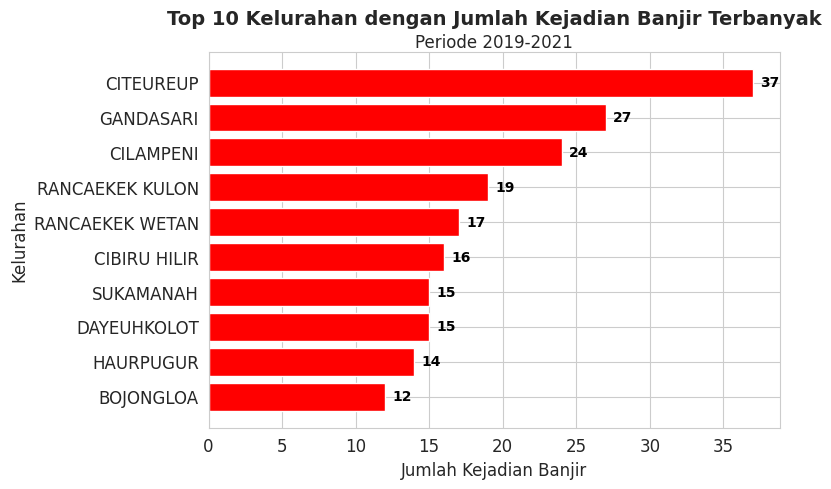

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it has columns 'kelurahan' and 'jumlah_kejadian'
top_10_kelurahan = df2.groupby('kelurahan')['jumlah_kejadian'].sum().sort_values(ascending=True).tail(10)

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.barh(top_10_kelurahan.index, top_10_kelurahan.values, color='red')
plt.xlabel("Jumlah Kejadian Banjir", fontsize=12)
plt.ylabel("Kelurahan", fontsize=12)
plt.title("Top 10 Kelurahan dengan Jumlah Kejadian Banjir Terbanyak", fontsize=14, fontweight='bold', y=1.05) # Adjust main title position
plt.text(0.5, 1.0, "Periode 2019-2021", ha='center', va='bottom', transform=plt.gca().transAxes, fontsize=12) # Add period text below
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to the bars
for i, v in enumerate(top_10_kelurahan.values):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='bold', va='center')

plt.tight_layout()
plt.show()

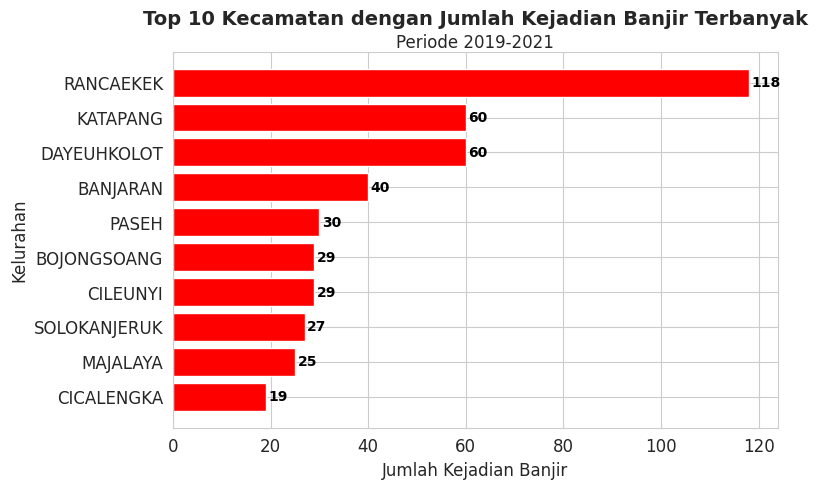

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it has columns 'kelurahan' and 'jumlah_kejadian'
top_10_kelurahan = df2.groupby('kecamatan')['jumlah_kejadian'].sum().sort_values(ascending=True).tail(10)

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.barh(top_10_kelurahan.index, top_10_kelurahan.values, color='red')
plt.xlabel("Jumlah Kejadian Banjir", fontsize=12)
plt.ylabel("Kelurahan", fontsize=12)
plt.title("Top 10 Kecamatan dengan Jumlah Kejadian Banjir Terbanyak", fontsize=14, fontweight='bold', y=1.05) # Adjust main title position
plt.text(0.5, 1.0, "Periode 2019-2021", ha='center', va='bottom', transform=plt.gca().transAxes, fontsize=12) # Add period text below
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to the bars
for i, v in enumerate(top_10_kelurahan.values):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='bold', va='center')

plt.tight_layout()
plt.show()

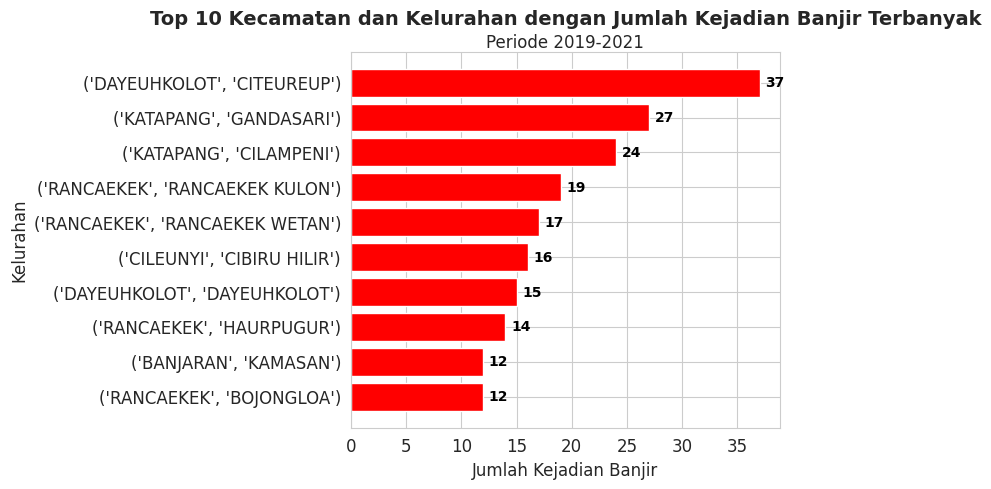

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it has columns 'kelurahan' and 'jumlah_kejadian'
top_10_kelurahan = df2.groupby(['kecamatan','kelurahan'])['jumlah_kejadian'].sum().sort_values(ascending=True).tail(10)

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
# Convert the MultiIndex to strings for plotting
plt.barh(top_10_kelurahan.index.map(str), top_10_kelurahan.values, color='red')
plt.xlabel("Jumlah Kejadian Banjir", fontsize=12)
plt.ylabel("Kelurahan", fontsize=12)
plt.title("Top 10 Kecamatan dan Kelurahan dengan Jumlah Kejadian Banjir Terbanyak", fontsize=14, fontweight='bold', y=1.05) # Adjust main title position
plt.text(0.5, 1.0, "Periode 2019-2021", ha='center', va='bottom', transform=plt.gca().transAxes, fontsize=12) # Add period text below
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to the bars
for i, v in enumerate(top_10_kelurahan.values):
    plt.text(v + 0.5, i, str(v), color='black', fontweight='bold', va='center')

plt.tight_layout()
plt.show()

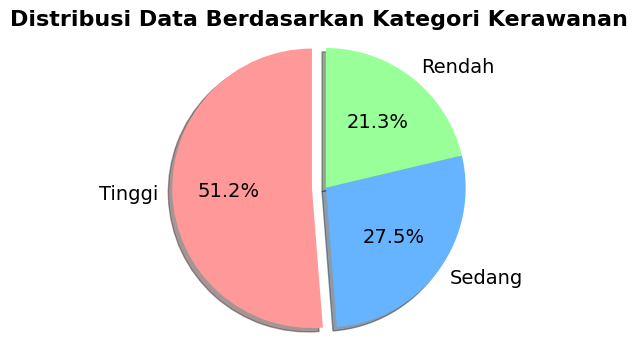

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
category_counts = df['Kategori Kerawanan'].value_counts()

# Define color palette
colors = ['#ff9999','#66b3ff','#99ff99']

# Explode the largest slice
explode = (0.1, 0, 0)

# Create the pie chart with enhancements
plt.figure(figsize=(4, 4))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        shadow=True, # Add shadow for depth
        textprops={'fontsize': 14}) # Increase font size of labels
plt.title('Distribusi Data Berdasarkan Kategori Kerawanan', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

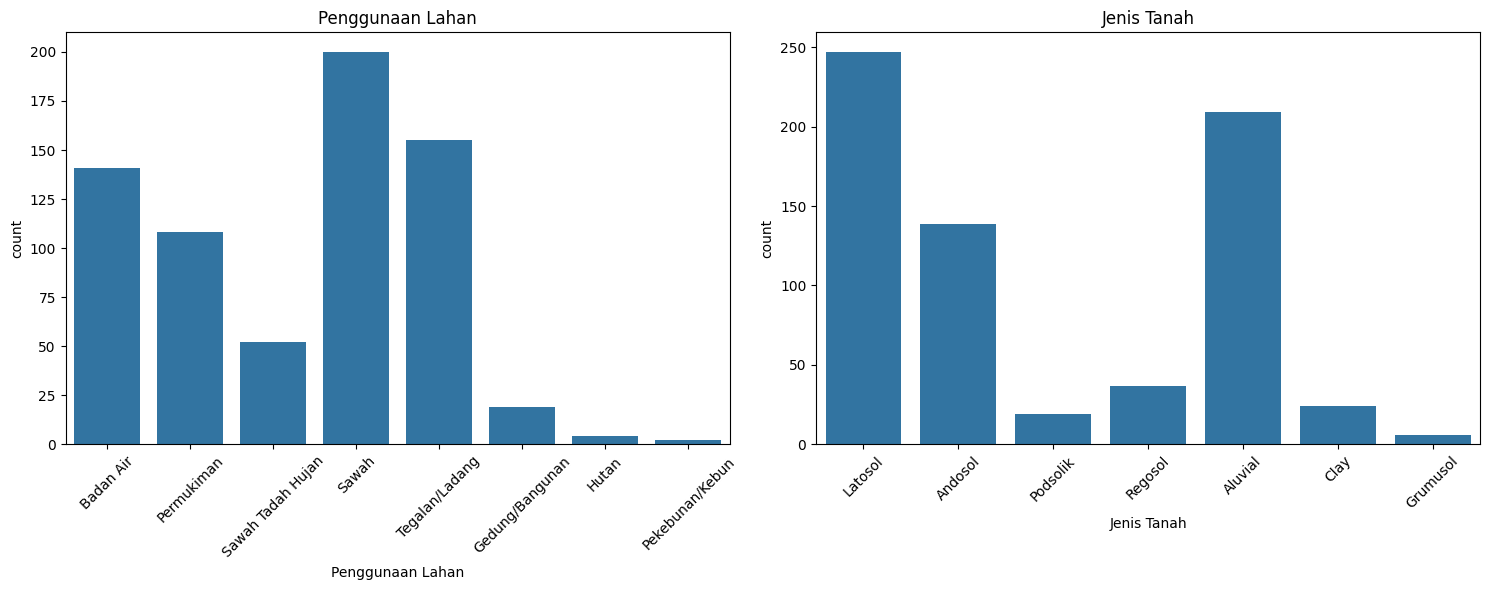

In [ ]:
# prompt: barplot penggunaan lahan, dan jenis tanah

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Penggunaan Lahan' and 'Jenis Tanah' columns
plt.figure(figsize=(15, 6))

# Bar plot for Penggunaan Lahan
plt.subplot(1, 2, 1)
sns.countplot(x='Penggunaan Lahan', data=df)
plt.title('Penggunaan Lahan')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Bar plot for Jenis Tanah
plt.subplot(1, 2, 2)
sns.countplot(x='Jenis Tanah', data=df)
plt.title('Jenis Tanah')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

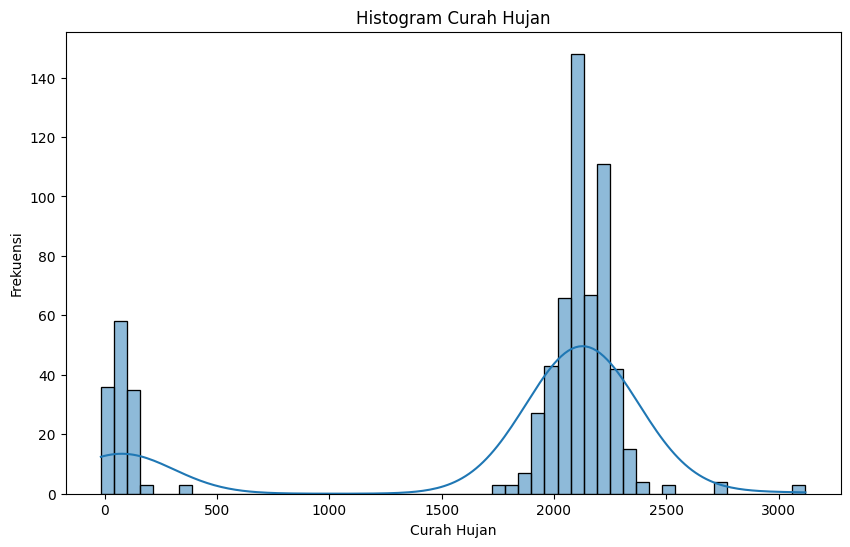

In [ ]:
# prompt: histogram curah_hujan

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has a column named 'curah_hujan'
plt.figure(figsize=(10, 6))
sns.histplot(df['curah_hujan'], kde=True)  # Use seaborn's histplot for better aesthetics
plt.title('Histogram Curah Hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Frekuensi')
plt.show()

## Pivot Tabel


In [ ]:
# Pivot table for 'Kategori Kerawanan' by 'Penggunaan Lahan' and 'Jenis Tanah'
pd.pivot_table(df, values='Kategori Kerawanan', index='Penggunaan Lahan', columns='Jenis Tanah', aggfunc='count')

Jenis Tanah,Aluvial,Andosol,Clay,Grumusol,Latosol,Podsolik,Regosol
Penggunaan Lahan,,,,,,,
Badan Air,25.0,61.0,NaN,1.0,38.0,9.0,7.0
Gedung/Bangunan,NaN,18.0,NaN,NaN,NaN,1.0,NaN
Hutan,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Pekebunan/Kebun,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Permukiman,1.0,40.0,NaN,3.0,61.0,3.0,NaN
Sawah,113.0,7.0,15.0,1.0,55.0,3.0,6.0
Sawah Tadah Hujan,NaN,10.0,NaN,NaN,39.0,NaN,3.0
Tegalan/Ladang,66.0,3.0,9.0,1.0,52.0,3.0,21.0


In [ ]:
df.groupby(['Kategori Kerawanan','Penggunaan Lahan','Jenis Tanah'])['curah_hujan'].mean()

Kategori Kerawanan  Penggunaan Lahan   Jenis Tanah
Rendah              Badan Air          Aluvial        1756.760600
                                       Andosol        1529.795918
                                       Grumusol       2063.620000
                                       Latosol        1533.111105
                                       Podsolik       1925.765667
                                       Regosol        2463.552857
                    Hutan              Aluvial        2222.777500
Sedang              Pekebunan/Kebun    Latosol        2213.860000
                    Sawah              Andosol        1265.117571
                                       Grumusol       2064.160000
                                       Podsolik        147.741000
                                       Regosol        2285.065000
                    Sawah Tadah Hujan  Andosol        2134.250000
                                       Regosol        2301.960000
                    Tegalan/Ladang     Aluvial        1944.874364
                                       Andosol          18.111000
                                       Clay           1546.691667
                                       Grumusol       2064.780000
                                       Latosol        1577.543923
                                       Podsolik       2320.310000
                                       Regosol        2044.645238
Tinggi              Gedung/Bangunan    Andosol        2023.333333
                                       Podsolik       2122.590000
                    Permukiman         Aluvial        2115.930000
                                       Andosol        1385.430200
                                       Grumusol       2071.970000
                                       Latosol        1681.811131
                                       Podsolik       2336.460000
                    Sawah              Aluvial        1931.141823
                                       Clay           1406.273800
                                       Latosol        1735.178218
                    Sawah Tadah Hujan  Latosol        1417.283128
Name: curah_hujan, dtype: float64

# Select Algorithm

In [ ]:
pip install pyCaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.0 MB/s eta 0:00:00
   ━━━

In [14]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
data=df[['curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah', 'Kategori Kerawanan']]
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
# initialize setup
from pycaret.classification import *
# Setting up the PyCaret environment with the training data and generating a profile report
clf1 = setup(data = train_data, target = 'Kategori Kerawanan')

,Description,Value
0,Session id,6882
1,Target,Kategori Kerawanan
2,Target type,Multiclass
3,Target mapping,"Rendah: 0, Sedang: 1, Tinggi: 2"
4,Original data shape,"(476, 4)"
5,Transformed data shape,"(476, 17)"
6,Transformed train set shape,"(333, 17)"
7,Transformed test set shape,"(143, 17)"
8,Numeric features,1
9,Categorical features,2


In [ ]:
#Comparing all models
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9882,0.9995,0.9882,0.9906,0.9881,0.9808,0.9823,0.2570
gbc,Gradient Boosting Classifier,0.9882,0.0000,0.9882,0.9906,0.9881,0.9808,0.9823,0.5800
et,Extra Trees Classifier,0.9882,0.9996,0.9882,0.9906,0.9881,0.9808,0.9823,0.4420
dt,Decision Tree Classifier,0.9852,0.9868,0.9852,0.9879,0.9851,0.9760,0.9777,0.0860
lightgbm,Light Gradient Boosting Machine,0.9761,0.9922,0.9761,0.9785,0.9754,0.9608,0.9628,0.5000
xgboost,Extreme Gradient Boosting,0.9731,0.9957,0.9731,0.9774,0.9722,0.9554,0.9588,0.1540
lr,Logistic Regression,0.9701,0.0000,0.9701,0.9741,0.9695,0.9510,0.9540,1.0280
nb,Naive Bayes,0.9609,0.9657,0.9609,0.9663,0.9593,0.9352,0.9399,0.0850
ridge,Ridge Classifier,0.9489,0.0000,0.9489,0.9576,0.9466,0.9150,0.9223,0.0870
lda,Linear Discriminant Analysis,0.9401,0.0000,0.9401,0.9458,0.9366,0.9005,0.9073,0.0840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#best_model = automl(optimize = 'Accuracy')
best_model = create_model('rf')

#Fine-tuning the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8824,0.9951,0.8824,0.9059,0.8814,0.8079,0.8232
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:05:14
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2936, verbose=0,
                       warm_start=False)

In [ ]:
predictions = predict_model(tuned_best_model, data = test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9620,1.0000,0.9620,0.9649,0.9619,0.9402,0.9419


In [ ]:
predictions

,curah_hujan,Penggunaan Lahan,Jenis Tanah,Kategori Kerawanan,prediction_label,prediction_score
610,1966.510010,Sawah,Aluvial,Tinggi,Tinggi,1.00
574,2232.580078,Hutan,Aluvial,Rendah,Tinggi,0.45
458,2262.389893,Tegalan/Ladang,Clay,Sedang,Sedang,0.79
432,2219.510010,Hutan,Aluvial,Rendah,Tinggi,0.55
134,2097.409912,Tegalan/Ladang,Latosol,Sedang,Sedang,1.00
...,...,...,...,...,...,...
160,2091.979980,Sawah,Latosol,Tinggi,Tinggi,1.00
351,140.009995,Badan Air,Latosol,Rendah,Rendah,0.98
416,86.899002,Permukiman,Latosol,Tinggi,Tinggi,0.97
152,2079.820068,Tegalan/Ladang,Aluvial,Sedang,Sedang,0.99


# Modelling dengan Scikit Learn

In [15]:
lahan_mapping = {
    'Badan Air': 1,
    'Gedung/Bangunan' : 2,
    'Hutan' : 3,
    'Pekebunan/Kebun' : 4,
    'Permukiman' : 5,
    'Sawah' : 6,
    'Sawah Tadah Hujan' : 7,
    'Semak Belukar' : 8,
    'Tegalan/Ladang' : 9
}

tanah_mapping = {
    'Regosol' : 1,
    'Litosol' : 2,
    'Andosol' : 3,
    'Grumusol' : 4,
    'Latosol' : 5,
    'Aluvial' : 6,
    'Podsolik' : 7,
    'Clay' : 8
}

In [16]:
#Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
data=df[['curah_hujan', 'Penggunaan Lahan', 'Jenis Tanah', 'Kategori Kerawanan']]
def transform(data):
  # Menggunakan map untuk transformasi kolom
  data['Jenis Tanah']= data['Jenis Tanah'].map(tanah_mapping)
  data['Penggunaan Lahan']= data['Penggunaan Lahan'].map(lahan_mapping)
  return data
data=transform(data)
X=data.drop('Kategori Kerawanan', axis=1)
y=data['Kategori Kerawanan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<ipython-input-16-f29d9479ac06>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Jenis Tanah']= data['Jenis Tanah'].map(tanah_mapping)
<ipython-input-16-f29d9479ac06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Penggunaan Lahan']= data['Penggunaan Lahan'].map(lahan_mapping)


In [17]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                             criterion='gini', max_depth=None, max_features='sqrt',
                             max_leaf_nodes=None, max_samples=None,
                             min_impurity_decrease=0.0, min_samples_leaf=1,
                             min_samples_split=2, min_weight_fraction_leaf=0.0,
                             monotonic_cst=None, n_estimators=100, n_jobs=-1,
                             oob_score=False, random_state=1098, verbose=0,
                             warm_start=False)

# Fit the model
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1098)

## Model Evaluation

In [18]:
from sklearn.metrics import classification_report,accuracy_score
y_pred=model.predict(X_test)
print("Accuracy Score ", accuracy_score(y_test, y_pred))


print("Classification Report Sentiment:")
print(classification_report(y_test, y_pred))

Accuracy Score  0.9951219512195122
Classification Report Sentiment:
              precision    recall  f1-score   support

      Rendah       0.97      1.00      0.99        37
      Sedang       1.00      1.00      1.00        57
      Tinggi       1.00      0.99      1.00       111

    accuracy                           1.00       205
   macro avg       0.99      1.00      0.99       205
weighted avg       1.00      1.00      1.00       205



In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score, f1_score,
    cohen_kappa_score, matthews_corrcoef, classification_report
)
y_bin = label_binarize(y_test, classes=model.classes_)
y_pred_proba = model.predict_proba(X_test)

# Menghitung metrik
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_bin, y_pred_proba, multi_class='ovr')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
kappa = cohen_kappa_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Menampilkan hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Kappa: {kappa:.4f}")
print(f"MCC: {mcc:.4f}")

Accuracy: 0.9951
AUC: 0.9999
Recall: 0.9970
Precision: 0.9912
F1-Score: 0.9940
Kappa: 0.9919
MCC: 0.9919


Text(45.722222222222214, 0.5, 'True Label')

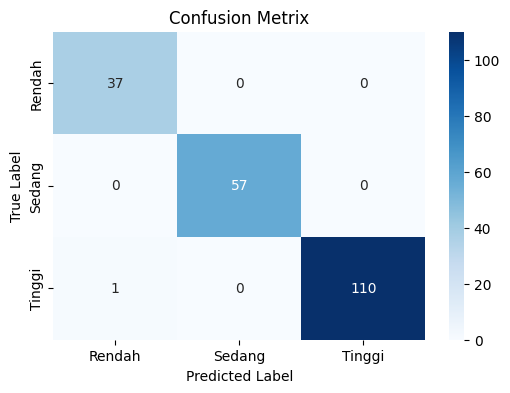

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Metrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## Save Model

In [ ]:
import pickle

# Simpan model ke file .pkl
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Salin file ke Google Drive
!cp tuned_best_model.pkl '/content/drive/MyDrive/MSIB/BISA AI/PROJECT CAPTONE_KEL 6/'

cp: cannot stat 'tuned_best_model.pkl': No such file or directory


# Predict Data Baru

In [ ]:
import pickle

# Load model dari file .pkl
with open('rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
data_baru = pd.DataFrame({
    'curah_hujan': [5000],
    'Penggunaan Lahan' : ['Permukiman'],
    'Jenis Tanah': ['Aluvial']
})

In [ ]:
lahan_mapping = {
    'Badan Air': 1,
    'Gedung/Bangunan' : 2,
    'Hutan' : 3,
    'Pekebunan/Kebun' : 4,
    'Permukiman' : 5,
    'Sawah' : 6,
    'Sawah Tadah Hujan' : 7,
    'Semak Belukar' : 8,
    'Tegalan/Ladang' : 9
}
tanah_mapping = {
    'Regosol' : 1,
    'Litosol' : 2,
    'Andosol' : 3,
    'Grumusol' : 4,
    'Latosol' : 5,
    'Aluvial' : 6,
    'Podsolik' : 7,
    'Clay' : 8
}

def transform(data):
  # Menggunakan map untuk transformasi kolom
  data['Jenis Tanah']= data['Jenis Tanah'].map(tanah_mapping)
  data['Penggunaan Lahan']= data['Penggunaan Lahan'].map(lahan_mapping)
  return data


In [ ]:
data_baru=transform(data_baru)
# Prediksi kerawanan banjir
prediksi = model.predict(data_baru)

# Prediksi probabilitas
probabilitas = model.predict_proba(data_baru)

# Format output
output_prob = f"""
Kelas_Kerawanan_Rendah: {probabilitas[0][0]}
Kelas_Kerawanan_Sedang: {probabilitas[0][1]}
kelas Kerawanan_Tinggi: {probabilitas[0][2]}
"""

# Output
print("Prediksi:", prediksi[0])
print('')
print("Probabilitas:", output_prob)

Prediksi: Tinggi

Probabilitas: 
Kelas_Kerawanan_Rendah: 0.29
Kelas_Kerawanan_Sedang: 0.02
kelas Kerawanan_Tinggi: 0.69



==========================================

In [ ]:
data_baru

,curah_hujan,Penggunaan Lahan,Jenis Tanah
0,5000,5,6


In [ ]:
lahan_mapping = {
    'Badan Air': 1,
    'Gedung/Bangunan' : 2,
    'Hutan' : 3,
    'Pekebunan/Kebun' : 4,
    'Permukiman' : 5,
    'Sawah' : 6,
    'Sawah Tadah Hujan' : 7,
    'Semak Belukar' : 8,
    'Tegalan/Ladang' : 9
}
tanah_mapping = {
    'Regosol' : 1,
    'Litosol' : 2,
    'Andosol' : 3,
    'Grumusol' : 4,
    'Latosol' : 5,
    'Aluvial' : 6,
    'Podsolik' : 7,
    'Clay' : 8
}

def transform(data):
  # Menggunakan map untuk transformasi kolom
  data['Jenis tanah']= data['Jenis tanah'].map(tanah_mapping)
  data['Penggunaan lahan']= data['Penggunaan lahan'].map(lahan_mapping)
  return data

In [ ]:
lahan_mapping = {
    'Badan Air': 1,
    'Gedung/Bangunan' : 2,
    'Hutan' : 3,
    'Pekebunan/Kebun' : 4,
    'Permukiman' : 5,
    'Sawah' : 6,
    'Sawah Tadah Hujan' : 7,
    'Semak Belukar' : 8,
    'Tegalan/Ladang' : 9
}
tanah_mapping = {
    'Regosol' : 1,
    'Litosol' : 2,
    'Andosol' : 3,
    'Grumusol' : 4,
    'Latosol' : 5,
    'Aluvial' : 6,
    'Podsolik' : 7,
    'Clay' : 8
}

def transform(data):
  # Menggunakan map untuk transformasi kolom
  # Changed column name from 'jenis tanah' to 'Jenis Tanah'
  data['Jenis Tanah']= data['Jenis Tanah'].map(tanah_mapping)
  # Changed column name from 'penggunaan lahan' to 'Penggunaan Lahan'
  data['Penggunaan Lahan']= data['Penggunaan Lahan'].map(lahan_mapping)
  return data